In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor   # 集成算法
from sklearn.model_selection import cross_val_score    # 交叉验证
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# reference  ------   https://blog.csdn.net/tonydz0523/article/details/84591954

In [3]:
# 数据导入
df = pd.read_excel('eng1123.xlsx',
                 usecols=['gcons','app_usage', 'alert','speed_change','Speed_KMH','time','totalm',
                          'day_n','car_style_n','age', 'gender','log_g_1','log_time_1','log_speed','log_sc'
])

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


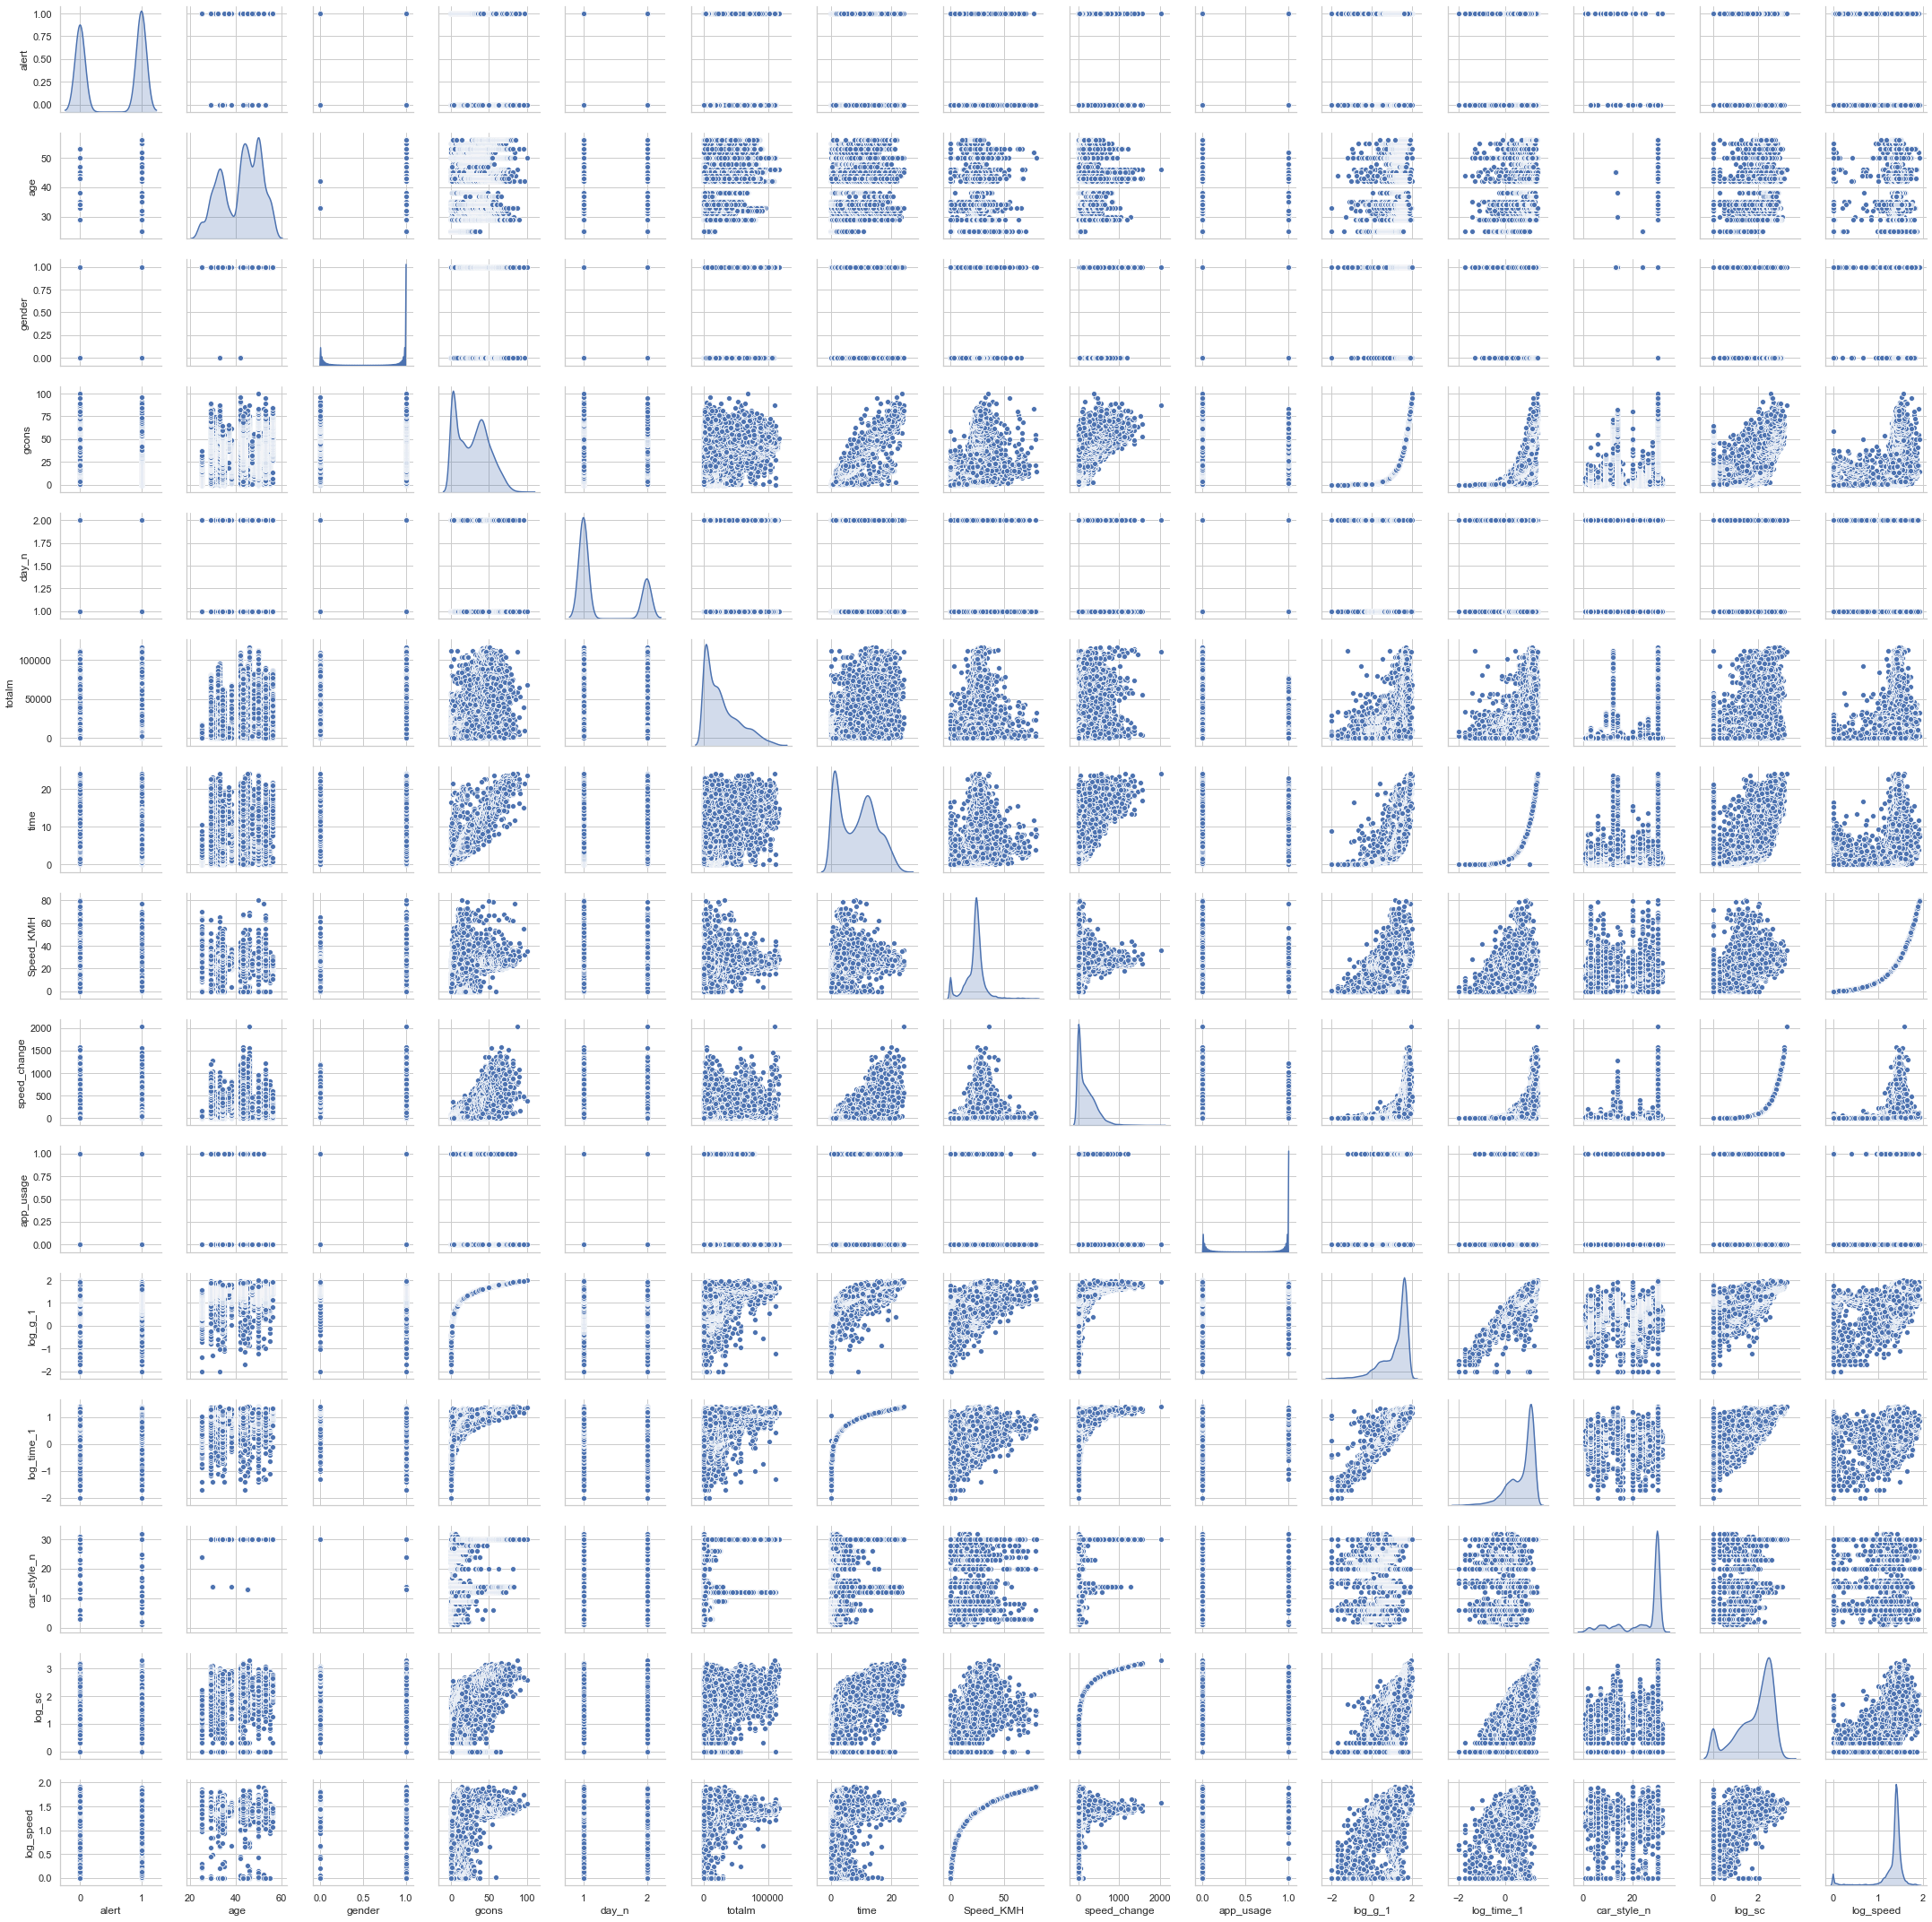

In [4]:
# 可视化数据关系
sns.set(style='whitegrid',context='notebook')   #style控制默认样式,context控制着默认的画幅大小
sns.pairplot(df, height=2,diag_kind='kde')
plt.savefig('x1.png')

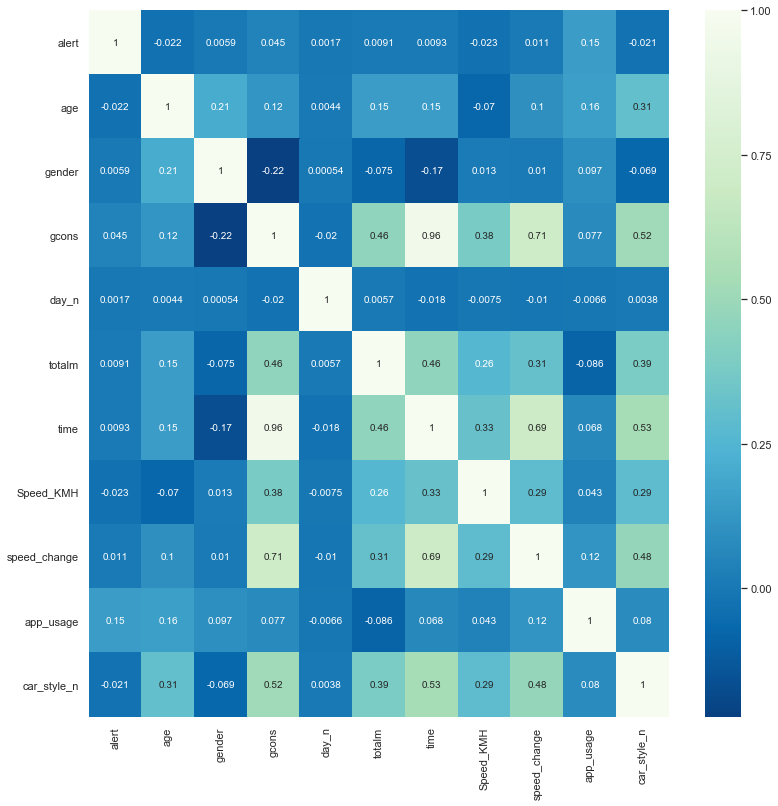

In [7]:
# 相关度
corr = df.corr()
# 相关度热力图
plt.figure(figsize=(13, 13))   # 300*300即为3,3；1000*1000即为10,10
# 这里一开始显示有问题，最上面和最下面都只显示一半。原因1：matplotlib版本bug
# https://blog.csdn.net/Miaosh999/article/details/105524183
ax = sns.heatmap(corr, cmap='GnBu_r', square=False, annot=True, annot_kws={'size':10})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top - 0.5)

#sns.heatmap(corr, cmap='GnBu_r', square=True, annot=True, annot_kws={'size':9})
plt.savefig('xx2.png')

In [55]:
# 特征选择
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,Ridge,Lasso

# 自变量特征
# CO2和gasconsumption、mileage、time强相关，这里仅选择gascons

feature=df[['ranking', 'alert', 'age', 'gender', 'accident', 'drivingexp',
'gcons',
'totalm',
'Speed_KMH',
'rapid_acc',
'rapid_deacc',
'sharp_turn',
'fatigdriving',
'nightdriving',
'app_usage']]

# 每列缺失值占比
print(feature.isnull().sum()/feature.shape[0])  

ranking         0.000000
alert           0.000000
age             0.350496
gender          0.348351
accident        0.323947
drivingexp      0.323947
gcons           0.000000
totalm          0.000000
Speed_KMH       0.000000
rapid_acc       0.000000
rapid_deacc     0.000000
sharp_turn      0.000000
fatigdriving    0.000000
nightdriving    0.000000
app_usage       0.000000
dtype: float64


In [ ]:
import sklearn
# Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.
# https://www.cnblogs.com/nxf-rabbit75/p/10497850.html
sorted(sklearn.metrics.SCORERS.keys())

RFECV特征选择结果——————————————————————————————————————————————————
Optimal number of features : 11
Ranking of features : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


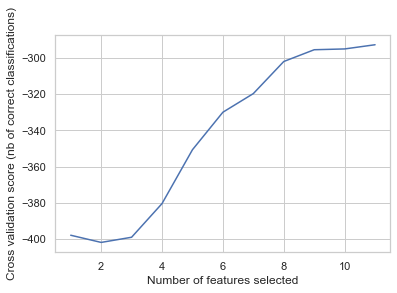

In [83]:
## 删除有缺失值的列，构成RFE的输入
feature2=df[['ranking', 'alert',
'gcons',
'totalm',
'Speed_KMH',
'rapid_acc',
'rapid_deacc',
'sharp_turn',
'fatigdriving',
'nightdriving',
'app_usage']]

y1=df['drivingscore']

# Create the RFE object and compute a cross-validated score.
# https://www.jianshu.com/p/025395835591
# 这里的算法可以换成其他
lr = LinearRegression()
# 这里一开始选择的是不带正则化的LR
# 但是如果RFE采用的底层模型不稳定的话，RFE就是不稳定的

# regression   https://blog.csdn.net/qq_36327687/article/details/85008414    https://www.jianshu.com/p/025395835591
rfecv = RFECV(estimator=lr,          # 学习器
              step=1,                 # 移除特征个数
              cv=KFold(5),      # 交叉验证几折
              scoring='neg_mean_squared_error',     # 学习器的评价标准.注意！"accuracy" "roc_auc"不适合连续变量
              verbose = 0,      #是否展示中间过程
              n_jobs = 1
              )
X_RFECV = rfecv.fit_transform(feature2,y1)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % list(rfecv.ranking_))


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

RFECV特征选择结果——————————————————————————————————————————————————
Optimal number of features : 14
Ranking of features : [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]


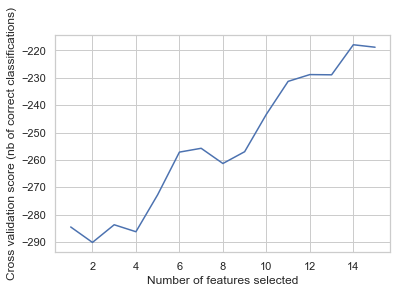

In [82]:
## 删除有缺失值的行，构成RFE的输入
df2=df.dropna(axis=0, how='any',inplace=False) # inplace=T则df直接被修改，df2并没有变化;inplace=False则将删除缺失值后的数据集赋给df2
y=df2['drivingscore']

feature3=df2[['ranking', 'alert', 'age', 'gender', 'accident', 'drivingexp',
'gcons',
'totalm',
'Speed_KMH',
'rapid_acc',
'rapid_deacc',
'sharp_turn',
'fatigdriving',
'nightdriving',
'app_usage']]

# Create the RFE object and compute a cross-validated score.
# https://www.jianshu.com/p/025395835591
# 这里的算法可以换成其他
lr = LinearRegression()
# 这里一开始选择的是不带正则化的LR
# 但是如果RFE采用的底层模型不稳定的话，RFE就是不稳定的

# The "accuracy" scoring is proportional to the number of correct
# regression   https://blog.csdn.net/qq_36327687/article/details/85008414    https://www.jianshu.com/p/025395835591
rfecv = RFECV(estimator=lr,          # 学习器
              step=1,                 # 移除特征个数
              cv=KFold(5),      # 交叉验证几折
              scoring='neg_mean_squared_error',     # 学习器的评价标准
              verbose = 0,
              n_jobs = 1
              )
X_RFECV = rfecv.fit_transform(feature3,y)
print("RFECV特征选择结果——————————————————————————————————————————————————")
print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % list(rfecv.ranking_))

'''
Optimal number of features : 14
Ranking of features : [1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
即删去totalm
'''

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [89]:
# df.head()
# feature3=feature.dropna(axis=0, how='any')
# print(feature3.head())
# type(df['app_usage'])
# df2=df.dropna(axis=0, how='any',inplace=False)
# df2.head()
# print(feature3.isnull().sum()/feature3.shape[0])  
# print("数组大小：", feature3.size)      #打印数组尺寸，即数组元素总数  
# print("数组形状：", feature3.shape)         #打印数组形状  
# print("数组的维度数目", feature3.ndim)      #打印数组的维度数目 
type(y.values)

numpy.ndarray

In [84]:
# 删去第8个特征totalm
feature4=df2[['ranking', 'alert', 'age', 'gender', 'accident', 'drivingexp',
'gcons',
'Speed_KMH',
'rapid_acc',
'rapid_deacc',
'sharp_turn',
'fatigdriving',
'nightdriving',
'app_usage']]

In [91]:
#删去所有有缺失值的列则X是feature2，Y是y1。删去所有有缺失值的行则X是feature4,Y是y.


## 删去列的拟合
# 自变量
X = feature2.values
# 因变量
y1 = y1.values

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y1, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y1).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y1, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

# 各个交叉验证的结果
df_score


D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'aut

,0,1,2,3,4
BayesianRidge,0.428434,0.358606,0.588620,0.655804,0.032011
LinearRegression,0.427895,0.356838,0.588992,0.655778,0.032310
ElasticNet,0.397713,0.358214,0.525621,0.640961,-0.006470
SVR,-0.855057,-0.676063,-0.137019,-0.208308,-1.414130
GBR,0.638188,0.593319,0.749249,0.865444,0.818654


In [92]:
# 各种评估结果
df_met

,ev,mae,mse,r2
BayesianRidge,0.593162,11.393480,275.534381,0.593162
LinearRegression,0.593165,11.394226,275.532348,0.593165
ElasticNet,0.567244,11.929585,293.087262,0.567244
SVR,0.080373,20.958478,622.867108,0.080310
GBR,0.868094,6.741127,89.334588,0.868094


In [95]:
## 删去行的拟合

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

# 自变量
X = feature4.values
# 因变量
# y=df2['drivingscore']
y = y.values

# 设置交叉验证次数
n_folds = 5

# 建立贝叶斯岭回归模型
br_model = BayesianRidge()

# 普通线性回归
lr_model = LinearRegression()

# 弹性网络回归模型
etc_model = ElasticNet()

# 支持向量机回归
svr_model = SVR()

# 梯度增强回归模型对象
gbr_model = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型
model_dic = [br_model, lr_model, etc_model, svr_model, gbr_model]
# 交叉验证结果
cv_score_list = []
# 各个回归模型预测的y值列表
pre_y_list = []

# 读出每个回归模型对象
for model in model_dic:
    # 将每个回归模型导入交叉检验
    scores = cross_val_score(model, X, y, cv=n_folds)
    # 将交叉检验结果存入结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存入列表
    pre_y_list.append(model.fit(X, y).predict(X))
### 模型效果指标评估 ###
# 获取样本量，特征数
n_sample, n_feature = X.shape
# 回归评估指标对象列表
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []
# 循环每个模型的预测结果
for pre_y in pre_y_list:
    # 临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for mdl in model_metrics_name:
        # 计算每个回归指标结果
        tmp_score = mdl(y, pre_y)
        # 将结果存入临时列表
        tmp_list.append(tmp_score)
    # 将结果存入回归评估列表
    model_metrics_list.append(tmp_list)
df_score = pd.DataFrame(cv_score_list, index=model_names)
df_met = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

# 各个交叉验证的结果
df_score


,0,1,2,3,4
BayesianRidge,0.505479,0.458836,0.350136,0.596815,0.541289
LinearRegression,0.505613,0.456812,0.348735,0.596865,0.540834
ElasticNet,0.478916,0.495068,0.323739,0.577547,0.512356
SVR,-0.059711,0.001967,-0.056123,-0.115135,-0.029404
GBR,0.678778,0.620100,0.626444,0.748297,0.656025


In [96]:
# 各种评估结果
df_met

,ev,mae,mse,r2
BayesianRidge,0.552181,10.559876,201.265388,0.552181
LinearRegression,0.552193,10.559920,201.260138,0.552193
ElasticNet,0.523547,10.987193,214.134391,0.523547
SVR,0.102873,15.892452,403.208416,0.102855
GBR,0.773510,7.610738,101.792393,0.773510
